In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json
import pandas as pd
import seaborn as sns

In [2]:
result_files = glob.glob("../src/dist/output/analysis/*.json")
result_data = []
files = []
for file in result_files:
    with open(file, "r") as f:
        result_data.append(json.load(f))
        files.append(file)
result_files = files

In [3]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        filename = "/" +filename+".json"
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [4]:
def get_node_load_data(simulationData):
    return simulationData["node-load-list"]

In [5]:
# [file][node][time]の配列に変換
def convert_node_load(data):
    load_data_list = []
    for d in data:
        node_data = get_node_load_data(d)
        load_data = []
        for j in range(len(node_data[0])):
            load_data_per_node = []
            for i in range(len(node_data)):
                load_data_per_node.append(node_data[i][j])
            load_data.append(load_data_per_node)  
        load_data_list.append(load_data)   
    return load_data_list

In [6]:
def get_user_connection_data(simulationData):
    return simulationData["user-connection-list"]

In [7]:
def get_file_names(scenarios, total_loads, server_funcs, network_funcs):
    file_names = []
    for scenario in scenarios:
        for total_load in total_loads:
            for server_func in server_funcs:
                for network_func in network_funcs:
                    file_names.append(scenario + total_load + "-" + server_func + "-" + network_func)
    return file_names

In [8]:
save_img_path = "./img/"
def save_img(plt, title):
    plt.savefig(save_img_path + title + '.pdf',  bbox_inches='tight')

In [9]:
# 複数のtimestepデータから箱ひげ図として表示する関数
def convert_and_plot_as_boxplot(timeStepDataList, show_files, title="boxplot", xlabel="File Name", ylabel="Value"):
    data = []
    for timeStepData in timeStepDataList:
        data.append(np.array(timeStepData))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(data, labels=show_files, showfliers=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)

In [ ]:
def convert_and_plot_as_boxplot_grouped_by_network_func(timeStepDataList, show_files, title="boxplot", xlabel="File Name", ylabel="Value"):
    data = []
    for timeStepData in timeStepDataList:
        data.append(np.array(timeStepData))
    df = pd.DataFrame(data, index=show_files).T
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=df, showfliers=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)

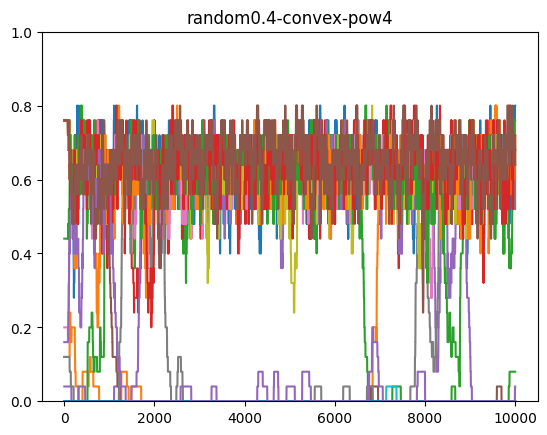

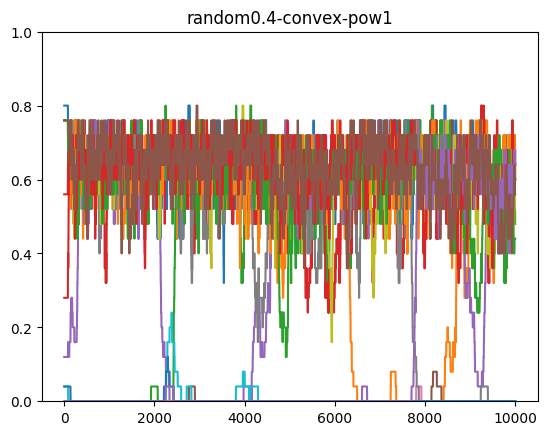

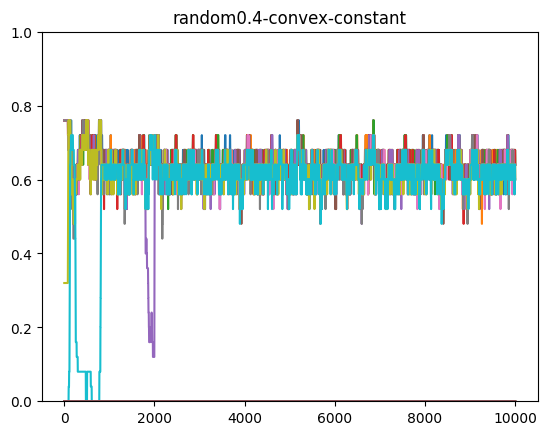

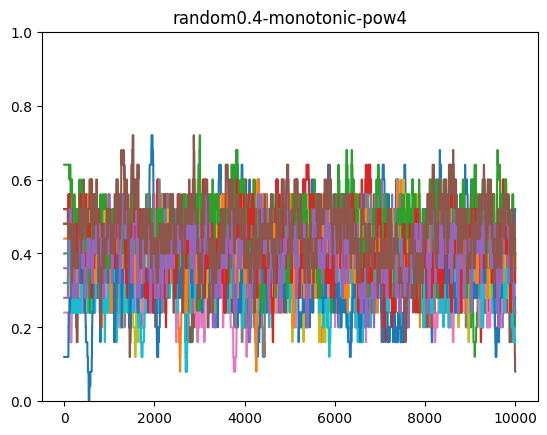

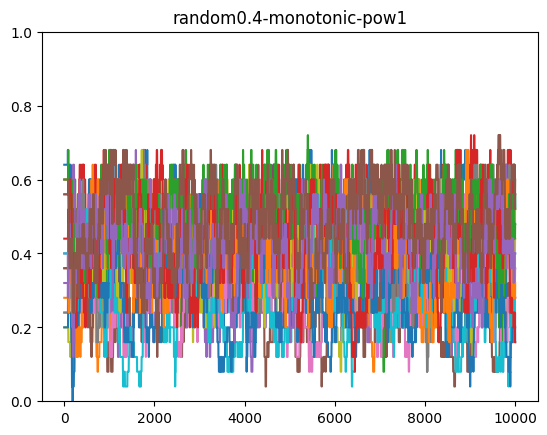

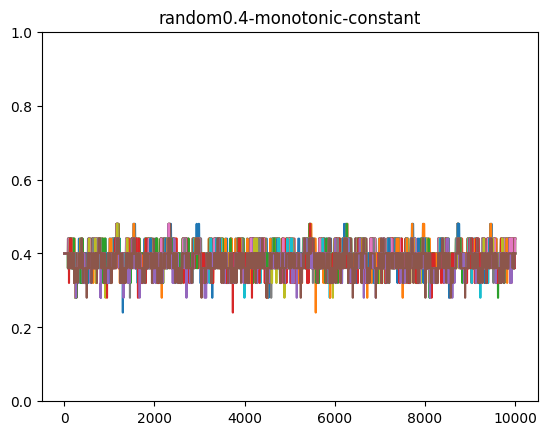

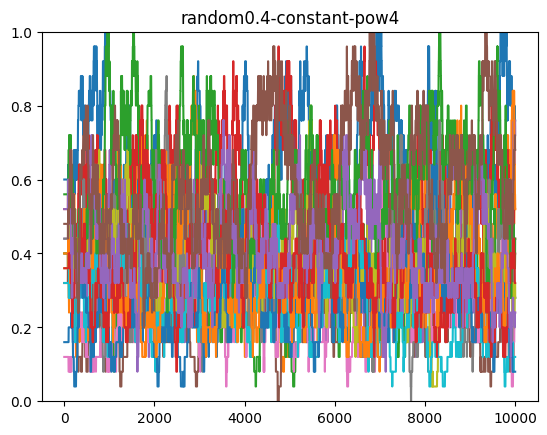

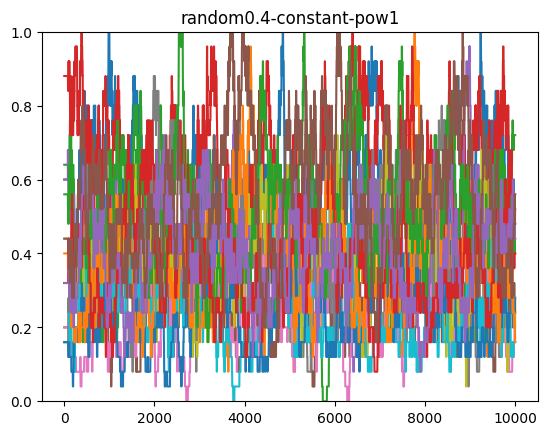

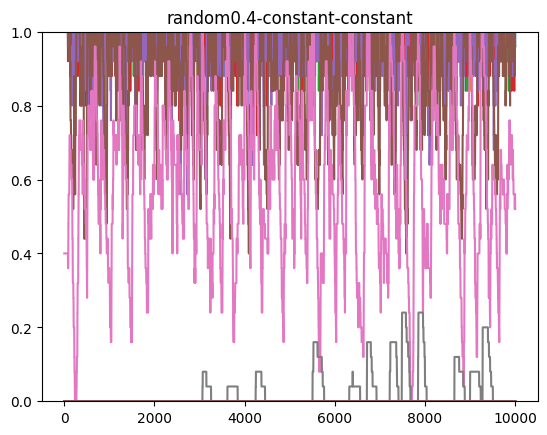

In [10]:
# ノードの負荷を表示

scenarios = ["random"]
total_loads= ["0.4"]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

centerLeft0.6-convex-pow4 ave: 0.6936252790649945
centerLeft0.6-convex-pow1 ave: 0.6926483518818284
centerLeft0.6-convex-constant ave: 0.6863101754500972
centerLeft0.6-monotonic-pow4 ave: 0.6068256516388476
centerLeft0.6-monotonic-pow1 ave: 0.6069915574611865
centerLeft0.6-monotonic-constant ave: 0.5995889006537524
centerLeft0.6-constant-pow4 ave: 0.7648028165919354
centerLeft0.6-constant-pow1 ave: 0.7717694365269104
centerLeft0.6-constant-constant ave: 0.8582537225681316


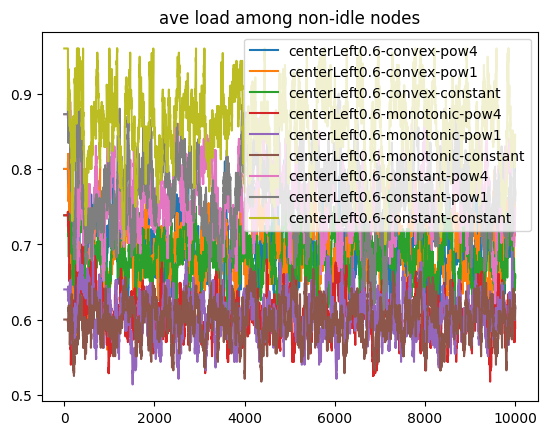

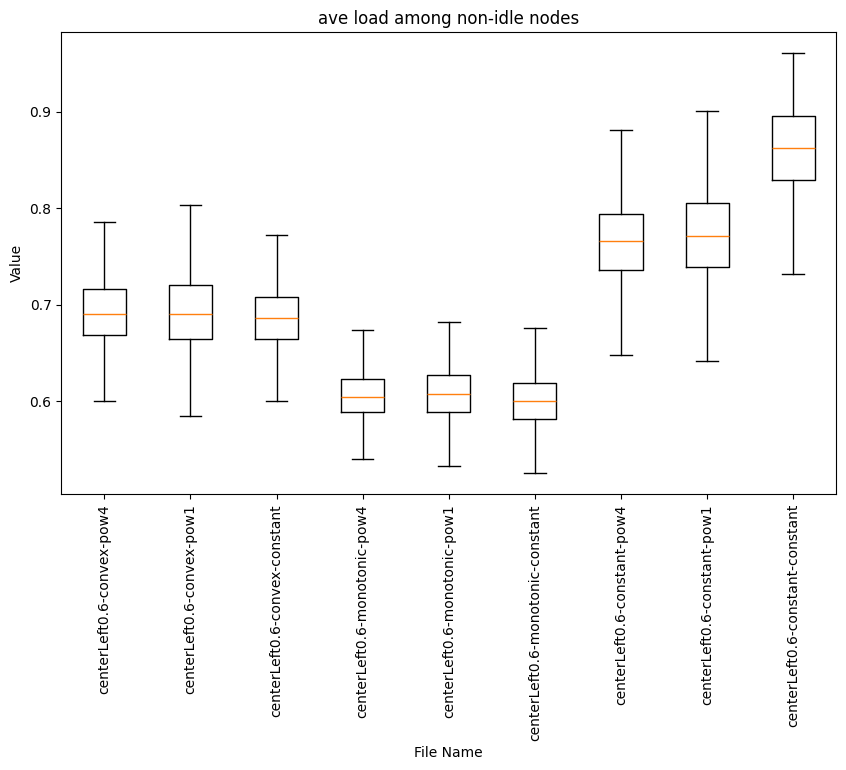

centerLeft0.6-convex-pow4 max: 0.9003601440576231
centerLeft0.6-convex-pow1 max: 0.8403361344537815
centerLeft0.6-convex-constant max: 0.78031212484994
centerLeft0.6-monotonic-pow4 max: 0.9003601440576231
centerLeft0.6-monotonic-pow1 max: 0.8403361344537815
centerLeft0.6-monotonic-constant max: 0.7202881152460985
centerLeft0.6-constant-pow4 max: 0.9603841536614646
centerLeft0.6-constant-pow1 max: 0.9603841536614646
centerLeft0.6-constant-constant max: 0.9603841536614646


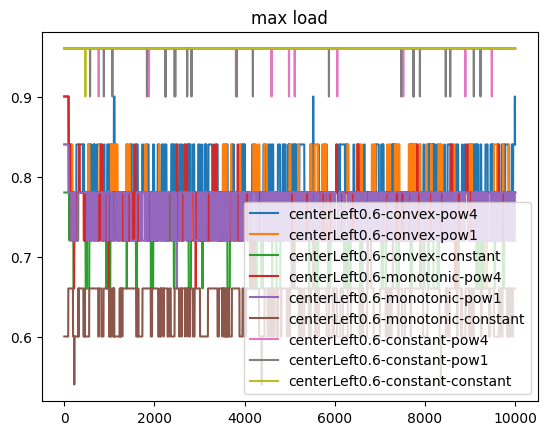

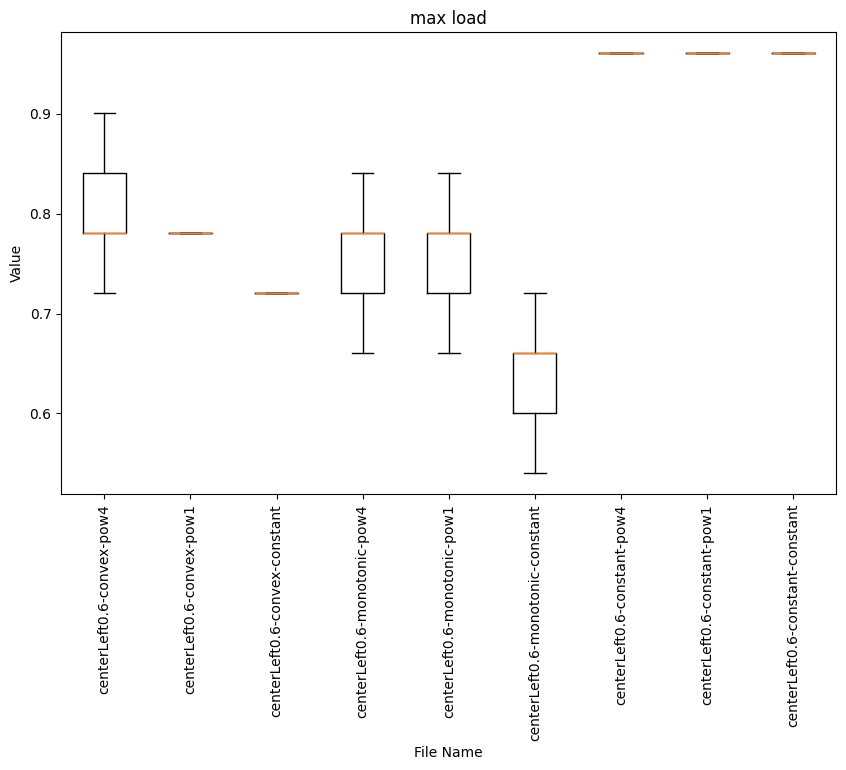

In [11]:
# 負荷の比較
scenarios = ["centerLeft"]
total_loads= ["0.6"]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)


data = get_data_by_filenames(show_files)

ave_node_load_list = []
max_node_load_list = []

for i,d in enumerate(data): 
    ave_node_load = []
    max_node_load = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        ave = 0
        max = 0
        non_idle_num = 0
        for load in timeStepData:
            if load != 0:
                non_idle_num += 1
            ave += load
            if max < load:
                max = load
        ave /= non_idle_num
        ave_node_load.append(ave)
        max_node_load.append(max)
    ave_node_load_list.append(ave_node_load)
    max_node_load_list.append(max_node_load)
for i,ave in enumerate(ave_node_load_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave load among non-idle nodes")    
plt.legend()
plt.show()

convert_and_plot_as_boxplot(ave_node_load_list, show_files, "ave load among non-idle nodes")
save_img(plt, "centerLeft_06_ave_load")
plt.show()

for i,max in enumerate(max_node_load_list):
    plt.plot(max, label= show_files[i])
    print(show_files[i], "max:", np.max(max))
plt.title("max load")
plt.legend()
plt.show()

convert_and_plot_as_boxplot(max_node_load_list, show_files, "max load")
save_img(plt, "centerLeft_06_max_load")
plt.show()

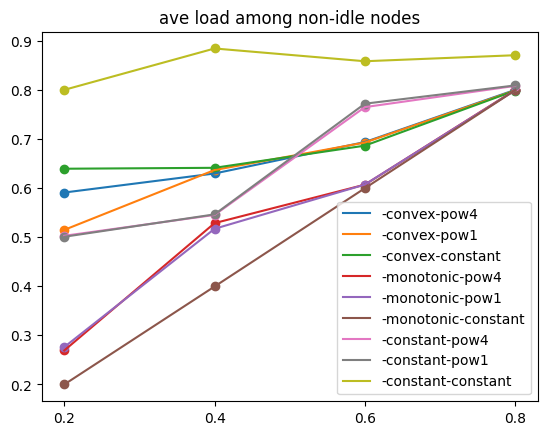

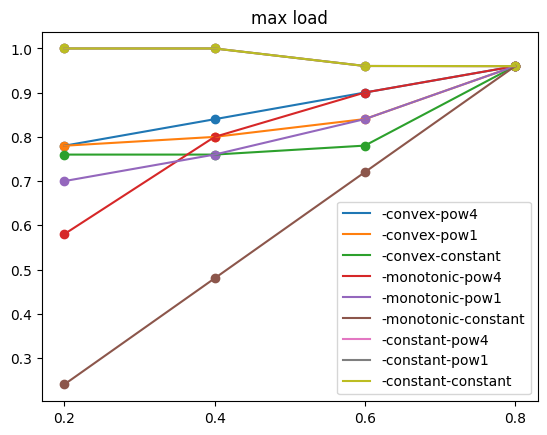

In [12]:
# 全体の負荷の変化による比較
scenarios = ["centerLeft"]
total_loads= ["0.2","0.4", "0.6", "0.8" ]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)


data = get_data_by_filenames(show_files)

ave_node_load_list =[]
max_node_load_list =[]
for _ in server_funcs:
    for _ in network_funcs:
        ave_node_load_list.append([])
        max_node_load_list.append([])
data_index = 0
for _ in scenarios:
    for i in range(len(total_loads)):
        for j in range(len(server_funcs)):
            for k in range(len(network_funcs)):
                target_index =j*len(network_funcs) + k
                ave_node_load = []
                max_node_load = []
                node_load_data = get_node_load_data(data[data_index])
                for timeStepData in node_load_data:
                    ave = 0
                    max = 0
                    non_idle_num = 0
                    for load in timeStepData:
                        if load != 0:
                            non_idle_num += 1
                        ave += load
                        if max < load:
                            max = load
                    ave /= non_idle_num
                    ave_node_load.append(ave)
                    max_node_load.append(max)
                
                ave_node_load_list[target_index].append(np.mean(ave_node_load))
                max_node_load_list[target_index].append(np.max(max_node_load))
                data_index += 1

for i,ave in enumerate(ave_node_load_list):
    plt.plot(total_loads,ave_node_load_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,ave_node_load_list[i])
    
plt.title("ave load among non-idle nodes")    
plt.legend()
save_img(plt, "centerLeft_all_ave_load")
plt.show()

for i,max in enumerate(max_node_load_list):
    plt.plot(total_loads,max_node_load_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,max_node_load_list[i])
plt.title("max load")
plt.legend()
save_img(plt, "centerLeft_all_max_load")
plt.show()

centerLeft0.6-convex-pow4 ave num of idle: 2.167083291670833
centerLeft0.6-convex-pow1 ave num of idle: 2.133086691330867
centerLeft0.6-convex-constant ave num of idle: 2.0183981601839815
centerLeft0.6-monotonic-pow4 ave num of idle: 0.18348165183481652
centerLeft0.6-monotonic-pow1 ave num of idle: 0.18958104189581043
centerLeft0.6-monotonic-constant ave num of idle: 0.0
centerLeft0.6-constant-pow4 ave num of idle: 3.428257174282572
centerLeft0.6-constant-pow1 ave num of idle: 3.541645835416458
centerLeft0.6-constant-constant ave num of idle: 4.814618538146186


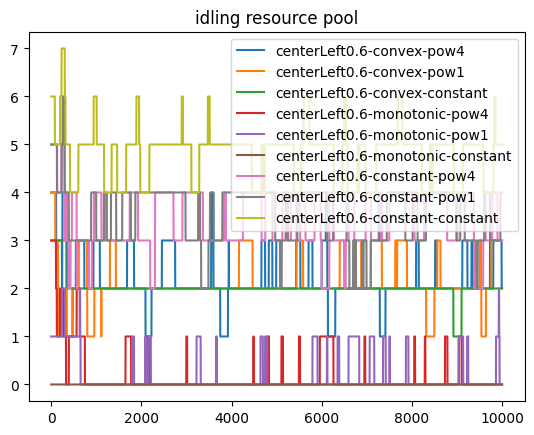

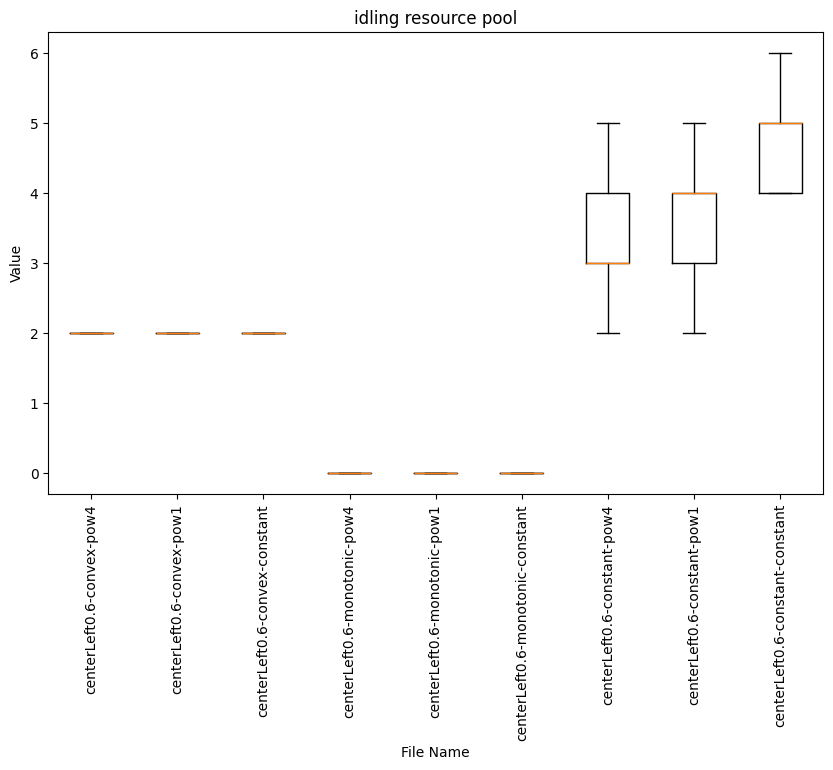

In [13]:
# アイドルリソース数を表示
scenarios = ["centerLeft"]
total_loads= ["0.6"]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)


data = get_data_by_filenames(show_files)
idling_resource_num_list = []
for i,d in enumerate(data): 
    idling_resource_num = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        idling_resource_sum = 0
        for load in timeStepData:
            if load == 0:
                idling_resource_sum +=1
        idling_resource_num.append(idling_resource_sum)
    plt.plot(idling_resource_num, label=show_files[i])
    idling_resource_num_list.append(idling_resource_num)
    print(show_files[i], "ave num of idle:", np.average(idling_resource_num))
plt.title("idling resource pool")    
plt.legend()
plt.show()

convert_and_plot_as_boxplot(idling_resource_num_list, show_files, "idling resource pool")
save_img(plt, "centerLeft_06_idle")
plt.show()

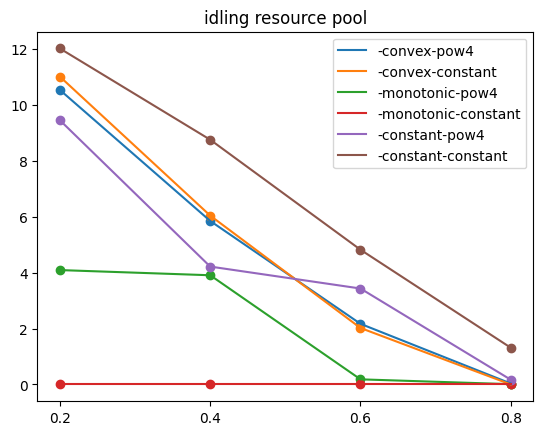

In [14]:
# 全体の負荷の変化によるアイドルリソース数の比較
scenarios = ["centerLeft"]
total_loads= ["0.2","0.4", "0.6", "0.8" ]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)

data = get_data_by_filenames(show_files)
idling_resource_num_list = []
for _ in server_funcs:
    for _ in network_funcs:
        idling_resource_num_list.append([])

data_index = 0

for _ in scenarios:
    for i in range(len(total_loads)):
        for j in range(len(server_funcs)):
            for k in range(len(network_funcs)):
                target_index =j*len(network_funcs) + k
                idling_resource_num = []
                node_load_data = get_node_load_data(data[data_index])
                for timeStepData in node_load_data:
                    idling_resource_sum = 0
                    for load in timeStepData:
                        if load == 0:
                            idling_resource_sum +=1
                    idling_resource_num.append(idling_resource_sum)
                idling_resource_num_list[target_index].append(np.mean(idling_resource_num))
                data_index += 1

for i,ave in enumerate(idling_resource_num_list):
    plt.plot(total_loads,idling_resource_num_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,idling_resource_num_list[i])
    
plt.title("idling resource pool")    
plt.legend()
save_img(plt, "centerLeft_all_idle")
plt.show()


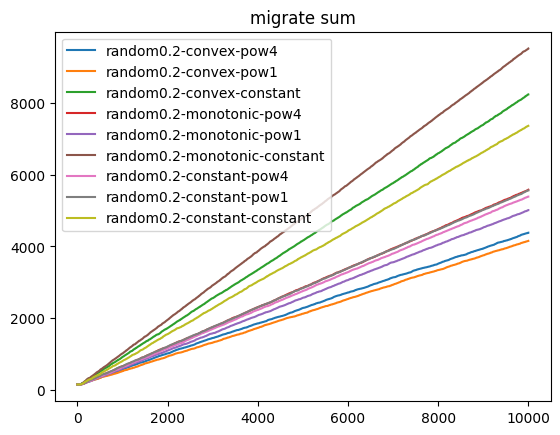

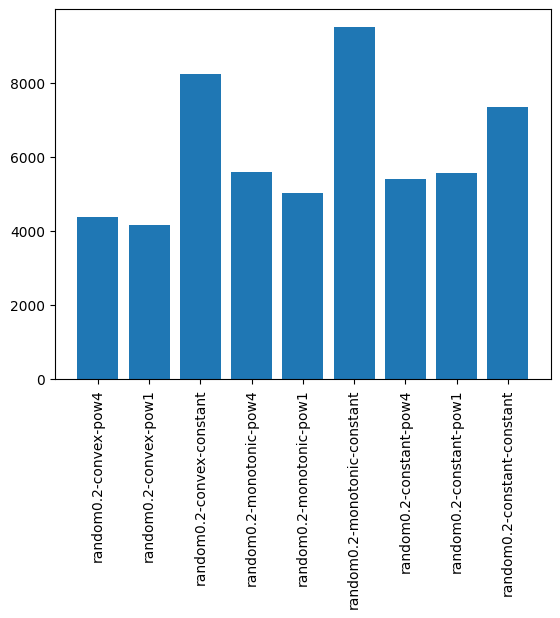

In [15]:
# サーバ切り替え回数の比較
scenarios = ["random"]
total_loads= ["0.2"]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)


data = get_data_by_filenames(show_files)
migrate_count_list = []
for i, d in enumerate(data):
    user_connection_data = get_user_connection_data(d)
    migrate_sum_list = []
    migrate_sum = 0
    connect_node_list = [-1] * len(user_connection_data[0])
    for timeStepData in user_connection_data:
        for j in range(len(timeStepData)):
            if (connect_node_list[i] == -1) or (connect_node_list[j] == timeStepData[j]):
                pass
            else:
                migrate_sum +=1
            connect_node_list[j] = timeStepData[j]
        migrate_sum_list.append(migrate_sum)
    plt.plot(migrate_sum_list, label=show_files[i])
    migrate_count_list.append(migrate_sum_list[len(migrate_sum_list)-1])
plt.title("migrate sum")    
plt.legend()
plt.show()

plt.bar(show_files, migrate_count_list)
plt.xticks(rotation=90)
plt.show()

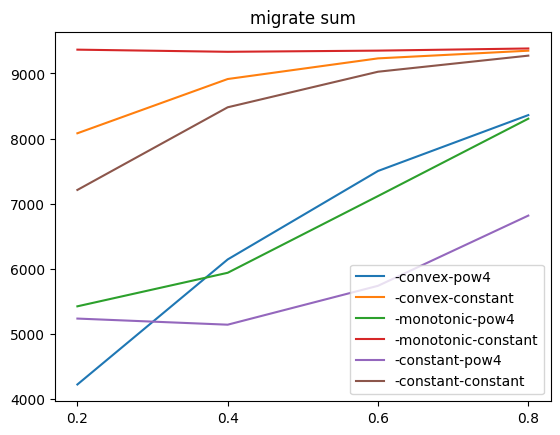

In [16]:
# 負荷の変化によるサーバ切り替え回数の比較

scenarios = ["random"]
total_loads= ["0.2","0.4", "0.6", "0.8" ]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)

data = get_data_by_filenames(show_files)
migrate_count_list = []
for _ in server_funcs:
    for _ in network_funcs:
        migrate_count_list.append([])
data_index = 0

for _ in scenarios:
    for i in range(len(total_loads)):
        for j in range(len(server_funcs)):
            for k in range(len(network_funcs)):
                target_index =j*len(network_funcs) + k
                user_connection_data = get_user_connection_data(data[data_index])
                migrate_sum_list = []
                migrate_sum = 0
                connect_node_list = [-1] * len(user_connection_data[0])
                for timeStepData in user_connection_data:
                    for l in range(len(timeStepData)):
                        if (connect_node_list[l] == -1) or (connect_node_list[l] == timeStepData[l]):
                            pass
                        else:
                            migrate_sum +=1
                        connect_node_list[l] = timeStepData[l]
                migrate_count_list[target_index].append(migrate_sum)
                data_index += 1

for i,ave in enumerate(migrate_count_list):
    plt.plot(total_loads,migrate_count_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
plt.title("migrate sum")    
plt.legend()
plt.show()

centerLeft0.6-convex-pow4 ave: 61.625258107902134
centerLeft0.6-convex-pow1 ave: 60.720754043938754
centerLeft0.6-convex-constant ave: 116.17270673823076
centerLeft0.6-monotonic-pow4 ave: 61.26326975687455
centerLeft0.6-monotonic-pow1 ave: 58.11110757876069
centerLeft0.6-monotonic-constant ave: 119.40982985092668
centerLeft0.6-constant-pow4 ave: 47.111798033312056
centerLeft0.6-constant-pow1 ave: 47.43701549394142
centerLeft0.6-constant-constant ave: 114.57891274560896


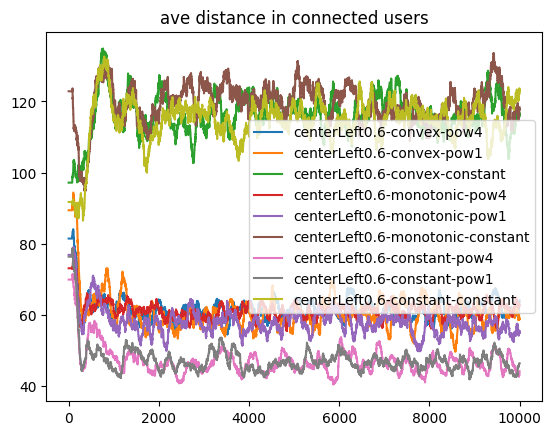

centerLeft0.6-convex-pow4 max: 150.8648012653838
centerLeft0.6-convex-pow1 max: 213.13451342552048
centerLeft0.6-convex-constant max: 282.66408366808173
centerLeft0.6-monotonic-pow4 max: 154.74652939701974
centerLeft0.6-monotonic-pow1 max: 205.10013997618282
centerLeft0.6-monotonic-constant max: 278.65945619166087
centerLeft0.6-constant-pow4 max: 169.33935871159406
centerLeft0.6-constant-pow1 max: 183.3587357119357
centerLeft0.6-constant-constant max: 281.0238480820321


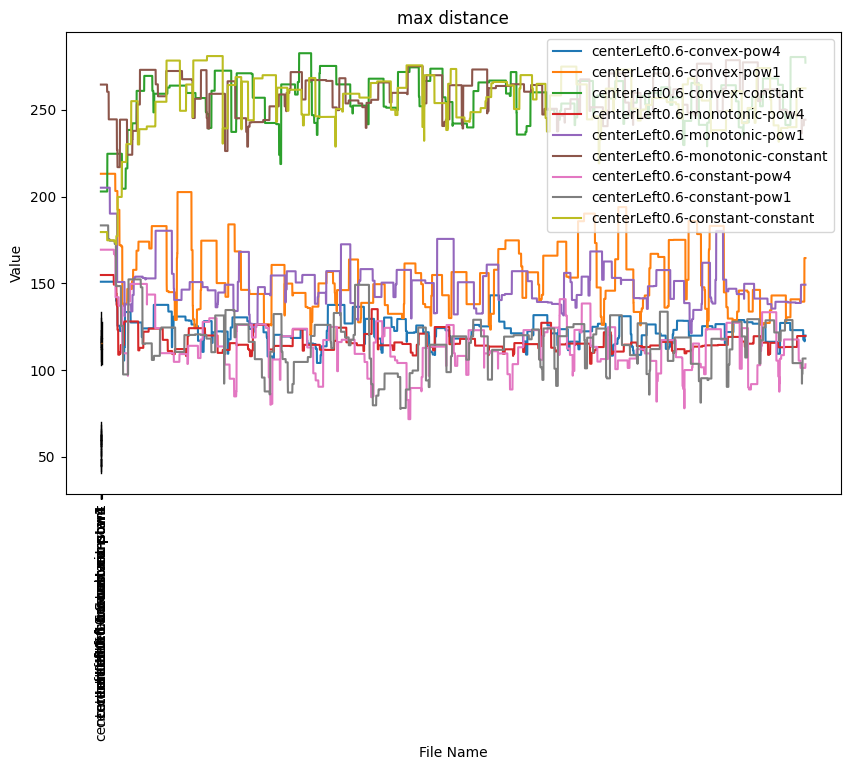

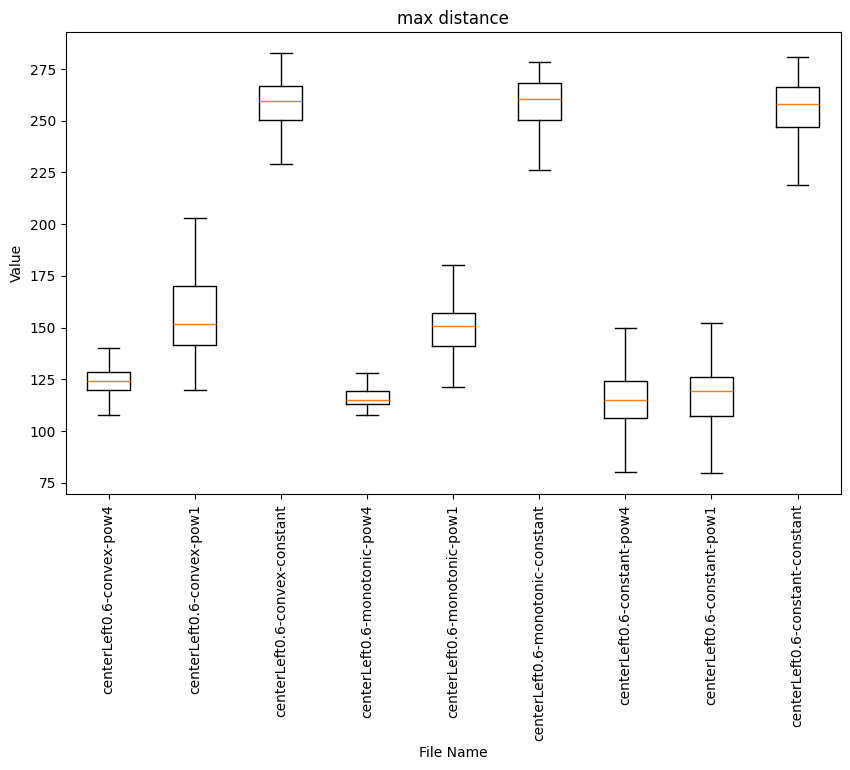

centerLeft0.6-convex-pow4 far user rate: 0.012337516248375162
centerLeft0.6-convex-pow1 far user rate: 0.056257499250075
centerLeft0.6-convex-constant far user rate: 0.44517860713928603
centerLeft0.6-monotonic-pow4 far user rate: 0.0038064943505649435
centerLeft0.6-monotonic-pow1 far user rate: 0.056111263873612635
centerLeft0.6-monotonic-constant far user rate: 0.4715778422157784
centerLeft0.6-constant-pow4 far user rate: 0.007073042695730426
centerLeft0.6-constant-pow1 far user rate: 0.007321767823217678
centerLeft0.6-constant-constant far user rate: 0.43282109289071097


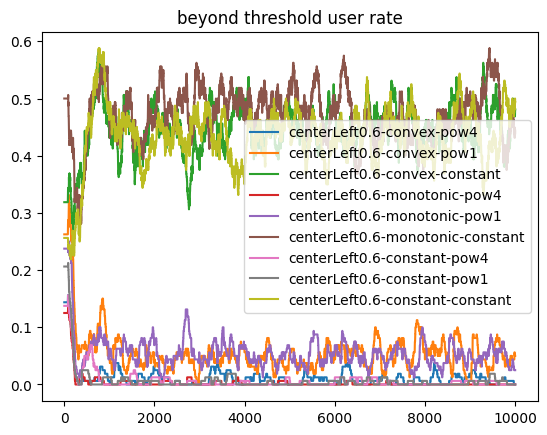

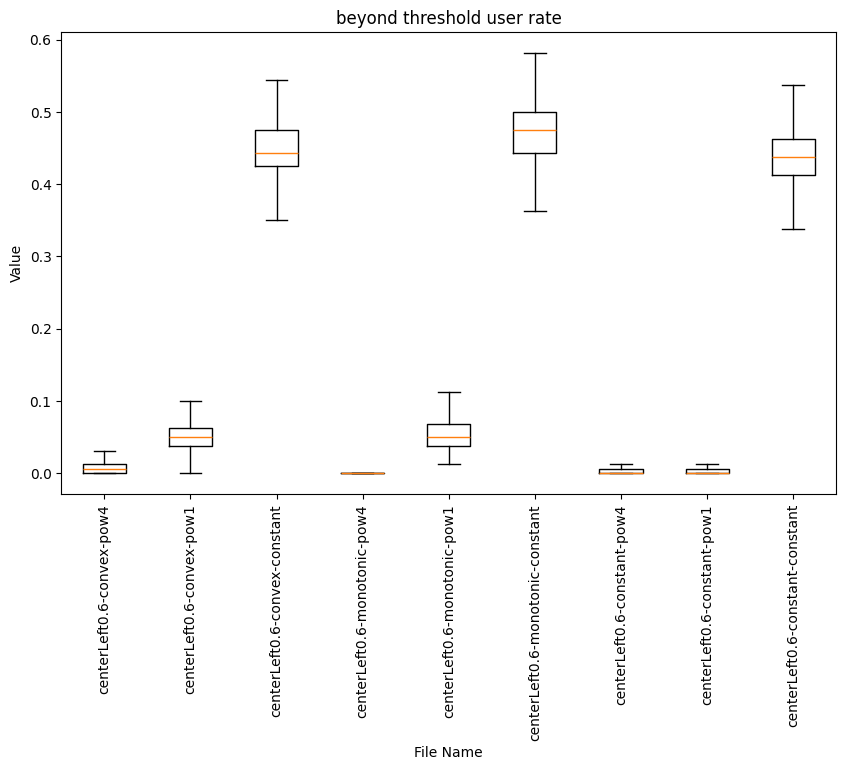

In [17]:
# 割り当て距離の比較
scenarios = ["centerLeft"]
total_loads= ["0.6"]
server_funcs = ["convex", "monotonic", "constant"]
# server_funcs = ["convex"]
network_funcs = ["pow4", "pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)


data = get_data_by_filenames(show_files)

ave_distance_list = []
max_distance_list = []
far_user_rate_list = []

for i,d in enumerate(data): 
    ave_distance = []
    max_distance = []
    far_rate = []
    user_connection_data = d["user-connection-distance-list"]
    threshold = d["network-distance-threshold"]
    for timeStepData in user_connection_data:
        ave = 0
        max = 0
        far = 0
        connection_num = 0
        for distance in timeStepData:
            if distance >= 0:
                connection_num += 1
            ave += distance
            if max < distance:
                max = distance
            if distance > threshold:
                far += 1
        ave /= connection_num
        far /= connection_num
        ave_distance.append(ave)
        max_distance.append(max)
        far_rate.append(far)
    ave_distance_list.append(ave_distance)
    max_distance_list.append(max_distance)
    far_user_rate_list.append(far_rate)

#平均
for i,ave in enumerate(ave_distance_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave distance in connected users")    
plt.legend()
plt.show()

# 平均距離の箱ひげ図
convert_and_plot_as_boxplot(ave_distance_list, show_files, "ave distance")
save_img(plt, "centerLeft_06_ave_distance")


#最大
for i,max in enumerate(max_distance_list):
    plt.plot(max, label= show_files[i])
    print(show_files[i], "max:", np.max(max))
plt.title("max distance")
plt.legend()
plt.show()

# 最大距離の箱ひげ図
convert_and_plot_as_boxplot(max_distance_list, show_files, "max distance")
save_img(plt, "centerLeft_06_max_distance")
plt.show()

# しきい値を超える割合
for i,rate in enumerate(far_user_rate_list):
    plt.plot(rate, label= show_files[i])
    print(show_files[i], "far user rate:", np.average(rate))
plt.title("beyond threshold user rate")
plt.legend()
plt.show()

# しきい値を超える割合の箱ひげ図
convert_and_plot_as_boxplot(far_user_rate_list, show_files, "beyond threshold user rate")
save_img(plt, "centerLeft_06_far_user_rate")
plt.show()

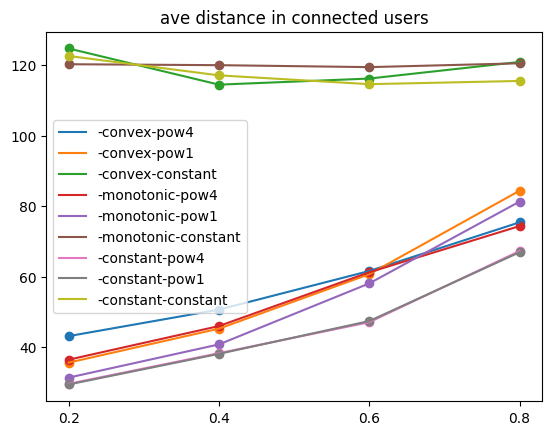

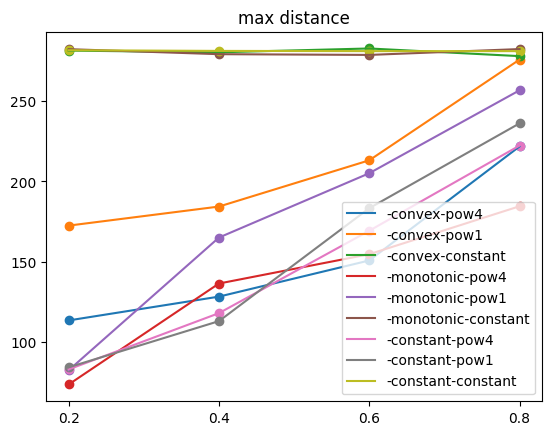

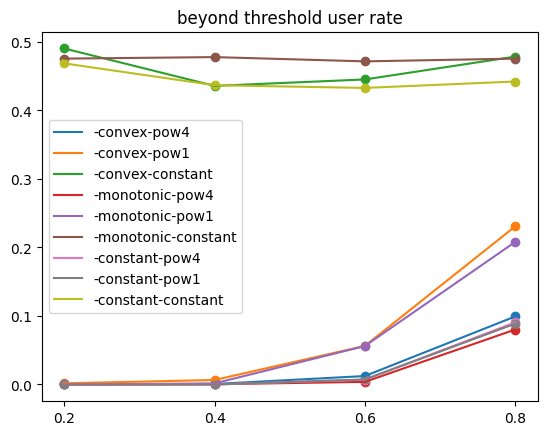

In [18]:
# 全体の負荷の変化による割り当て距離の比較

scenarios = ["centerLeft"]
total_loads= ["0.2","0.4", "0.6", "0.8" ]
server_funcs = ["convex", "monotonic", "constant"]
network_funcs = ["pow4","pow1", "constant"]
show_files = get_file_names(scenarios, total_loads, server_funcs, network_funcs)

data = get_data_by_filenames(show_files)
ave_distance_list =[]
max_distance_list =[]
far_user_rate_list =[]

for _ in server_funcs:
    for _ in network_funcs:
        ave_distance_list.append([])
        max_distance_list.append([])
        far_user_rate_list.append([])

data_index = 0

for _ in scenarios:
    for i in range(len(total_loads)):
        for j in range(len(server_funcs)):
            for k in range(len(network_funcs)):
                target_index =j*len(network_funcs) + k
                ave_distance = []
                max_distance = []
                far_rate = []
                user_connection_data = data[data_index]["user-connection-distance-list"]
                threshold = data[data_index]["network-distance-threshold"]
                for timeStepData in user_connection_data:
                    ave = 0
                    max = 0
                    far = 0
                    connection_num = 0
                    for distance in timeStepData:
                        if distance >= 0:
                            connection_num += 1
                        ave += distance
                        if max < distance:
                            max = distance
                        if distance > threshold:
                            far += 1
                    ave /= connection_num
                    far /= connection_num
                    ave_distance.append(ave)
                    max_distance.append(max)
                    far_rate.append(far)
                ave_distance_list[target_index].append(np.mean(ave_distance))
                max_distance_list[target_index].append(np.max(max_distance))
                far_user_rate_list[target_index].append(np.mean(far_rate))
                data_index += 1

#平均
for i,ave in enumerate(ave_distance_list):
    plt.plot(total_loads,ave_distance_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,ave_distance_list[i])

plt.title("ave distance in connected users")
plt.legend()
save_img(plt, "centerLeft_all_ave_distance")
plt.show()

# 最大
for i,max in enumerate(max_distance_list):
    plt.plot(total_loads,max_distance_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,max_distance_list[i])

plt.title("max distance")
plt.legend()
save_img(plt, "centerLeft_all_max_distance")
plt.show()


# しきい値を超える割合

for i,rate in enumerate(far_user_rate_list):
    plt.plot(total_loads,far_user_rate_list[i], label=get_file_names([""], [""], server_funcs, network_funcs)[i])
    plt.scatter(total_loads,far_user_rate_list[i])

plt.title("beyond threshold user rate")
plt.legend()
save_img(plt, "centerLeft_all_far_user_rate")
plt.show()